<img src="https://raw.githubusercontent.com/nickssonarrais/data-science/master/logo-SD-16x9_300i_sf.png" width="300"/>

# Análise de Séries Temporais (Teória/Prática)

### O que é uma série temporal (time series)?

**Conceito**: uma série temporal é um conjunto de observações coletadas sequencialmente ao longo do tempo em intervalos regulares(horas, dias, meses, anos). Exemplos: distribuição da conta de luz ao longo do tempo, bolsa de valores, temperatura de uma região, vendas mensais de uma empresa, casos de covid, entre outros.

<img src="https://d2908q01vomqb2.cloudfront.net/f1f836cb4ea6efb2a0b1b99f41ad8b103eff4b59/2019/06/03/gluonts-1.gif"/>

### Porquê eu preciso aprender sobre séries temporais?
- Existem muitas aplicações que são dependentes da análise de séries temporais. No geral, estudamos séries temporais para:
    - Análise e modelagem: o que é a série? quais características mais relevantes? qual a correlação dessa 
    série com outras? Exemplo: Existe uma relação entre temperatura e gripe?
    - Previsão: eu quero prever os próximos valores, a partir dos valores
    históricos da série temporal.  (Exemplo: previsão de vendas, previsão de ações, previsão de atributos de tempo...)

**Uma série temporal não é um dado comum**: Você precisa dominar as técnicas para resolver seu problema. Uma algoritmo tradicional de **machine learning** como uma regressão linear não consegue resolver bem problemas de previsão de séries temporais, pois são projetados para modelagem de variáveis independentes do tempo. Há um série de algoritmos estatísticos para previsão de séries temporais (ex. ARIMA)

### Como analisar uma série temporal?
A maneira tradicional de analisar uma série temporal é através da sua decomposição nas componentes de tendência, ciclo e sazonalidade.

- **Tendência**: Indica a direção, o comportamente e avelocidade durante um período de tempo: se a serie cresce, descreve ou se permanece estável; Exemplo: a ação X está com tendência de alta! se cresce linear, quadratíca? 
<img src="tendencia.png"/>

- **Sazonalidade**: Indica como variações repetitivas e periódicas ocorrem  numa série temporal. Há padrões que ocorrem durante o tempo que se repete a cada período idêntico de tempo (como anos, meses e semanas). 
Exemplo: No incio do ano aqui Ceará, ocorre o periodo de chuvas e existe um volume de precipitação nestes meses. 
<img src="sazonalidade.png"/>

**Tendência + Sazonalidade**
<img src="tendencia_sazonalidade.png"/>


**Ruído**: se refere a quedas ou saltos estranhos numa série temporal. Normalmente,o ruído pode caracterizadas por eventos externos e imprevisíveis.
    <img src="ruido.png"/>



### Conceito de estacionaridade de uma série temporal?


- **Estacionariedade**: Indica se uma série tem um comportamento aleatório ao longo do tempo ou não. Uma série é estacionária se seus valores para média, variância e covariância permanece constantes ao longo da dimensão espacial.

<img src="estacionaridade.png"/>


**Perceba que se uma série temporal não estacionária não possui nenhum tipo de tendência e/ou sazonalidade.**

### Conceito de autocorrelação

- **Autocorrelação**: Indica o valor de correlação durante o intervalo de tempo que foi cálculado. Exemplo: correlação entre o preço da ação da PETR4 e VALE3 durante um ano?

# NA PRÁTICA

###### Há várias bibliotecas para coletar dados da bolsa de valores
- yfinance: https://algotrading101.com/learn/yfinance-guide/
- investpy: https://investpy.readthedocs.io/
- pybovespa: https://pypi.org/project/pybovespa/
- quandl: https://www.quandl.com/
- pandasfinance: https://pypi.org/project/pandas-finance/
- pandasreader: https://pandas-datareader.readthedocs.io/en/latest/

In [2]:
##BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf 

### 1) Aquisição dos dados de ações

In [5]:
ticket = yf.Ticker('PETR4.SA')
#df = ticket.history(period='3y', interval='1mo')
df = ticket.history(interval='1d', start='2018-01-01', end='2021-01-01')

In [6]:
df.head()

Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2018-01-02  15.019504  15.353476  15.019504  15.353476  33461800        0.0   
2018-01-03  15.297813  15.511185  15.186490  15.492632  55940900        0.0   
2018-01-04  15.566848  15.733833  15.418416  15.520462  37064900        0.0   
2018-01-05  15.492632  15.641064  15.372030  15.613233  26958200        0.0   
2018-01-08  15.529737  15.798772  15.501906  15.798772  28400000        0.0   

            Stock Splits  
Date                      
2018-01-02             0  
2018-01-03             0  
2018-01-04             0  
2018-01-05             0  
2018-01-08             0

In [7]:
df.tail()

Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2020-12-22  27.200001  27.469999  27.049999  27.280001  46513200        0.0   
2020-12-23  27.430000  28.250000  27.350000  27.950001  49038900        0.0   
2020-12-28  28.360001  28.520000  28.180000  28.180000  36313300        0.0   
2020-12-29  28.379999  28.430000  27.990000  28.270000  29891100        0.0   
2020-12-30  28.350000  28.490000  28.200001  28.340000  36968200        0.0   

            Stock Splits  
Date                      
2020-12-22             0  
2020-12-23             0  
2020-12-28             0  
2020-12-29             0  
2020-12-30             0

<AxesSubplot:xlabel='Date'>

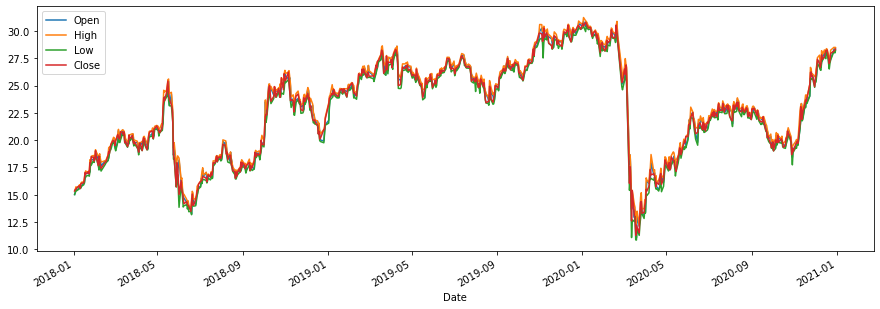

In [9]:
df[['Open','High','Low','Close']].plot(figsize=(15,5))


### 2) Decomposição de uma série temporal

#### Modelo matemáticos
https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
- Additive Model
    - y(t) = Trend_t + Seasonality_t + Noise_t
- Multiplicative Model
    - y(t) = Trend_t * Seasonality_t * Noise_t

In [10]:
df[['Close']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 739 entries, 2018-01-02 to 2020-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   739 non-null    float64
dtypes: float64(1)
memory usage: 11.5 KB


In [11]:
df.index[0]

Timestamp('2018-01-02 00:00:00')

In [12]:
df.index[-1]

Timestamp('2020-12-30 00:00:00')

In [13]:
df[['Close']].head()

Close
Date                 
2018-01-02  15.353476
2018-01-03  15.492632
2018-01-04  15.520462
2018-01-05  15.613233
2018-01-08  15.798772

In [14]:
decomposicao = seasonal_decompose(df[['Close']], model='additive', period=30, extrapolate_trend=30)

<AxesSubplot:xlabel='Date'>

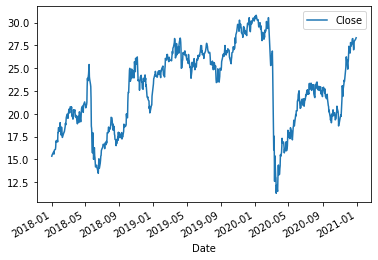

In [15]:
df[['Close']].plot()

In [16]:
decomposicao.seasonal + decomposicao.resid + decomposicao.trend

Date
2018-01-02    15.353476
2018-01-03    15.492632
2018-01-04    15.520462
2018-01-05    15.613233
2018-01-08    15.798772
                ...    
2020-12-22    27.280001
2020-12-23    27.950001
2020-12-28    28.180000
2020-12-29    28.270000
2020-12-30    28.340000
Length: 739, dtype: float64

In [17]:
decomposicao.trend.iloc[0:5]

Date
2018-01-02    15.920574
2018-01-03    16.013132
2018-01-04    16.105690
2018-01-05    16.198249
2018-01-08    16.290807
Name: trend, dtype: float64

In [18]:
decomposicao.

Date
2018-01-02   -0.602101
2018-01-03   -0.472886
2018-01-04   -0.428997
2018-01-05   -0.434919
2018-01-08   -0.396586
                ...   
2020-12-22   -1.428021
2020-12-23   -1.032612
2020-12-28   -1.131329
2020-12-29   -1.215814
2020-12-30   -1.473926
Name: resid, Length: 739, dtype: float64

<AxesSubplot:xlabel='Date'>

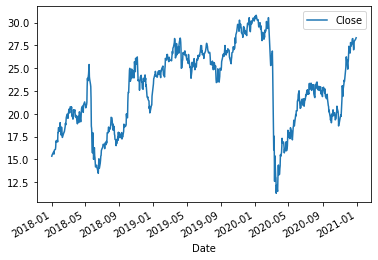

In [19]:
df[['Close']].plot()

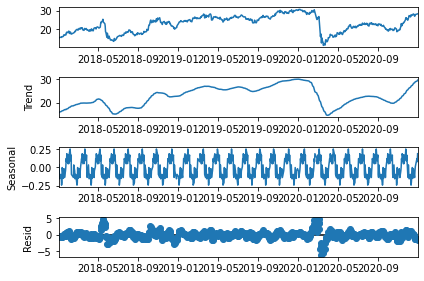

In [22]:
decomposicao.plot();

In [24]:
decomposicao.seasonal

Date
2018-01-02    0.035002
2018-01-03   -0.047614
2018-01-04   -0.156231
2018-01-05   -0.150097
2018-01-08   -0.095449
                ...   
2020-12-22   -0.046631
2020-12-23    0.010450
2020-12-28    0.121657
2020-12-29    0.078632
2020-12-30    0.189234
Name: seasonal, Length: 739, dtype: float64

In [25]:
decomposicao_multi = seasonal_decompose(df[['Close']], model='multiplicative', period=30, extrapolate_trend=30)

In [26]:
decomposicao_multi.seasonal

Date
2018-01-02    1.001288
2018-01-03    0.997155
2018-01-04    0.993094
2018-01-05    0.992630
2018-01-08    0.995874
                ...   
2020-12-22    0.999201
2020-12-23    1.001581
2020-12-28    1.007147
2020-12-29    1.004603
2020-12-30    1.011249
Name: seasonal, Length: 739, dtype: float64

In [28]:
max(decomposicao_multi.resid)

1.2389127993269076

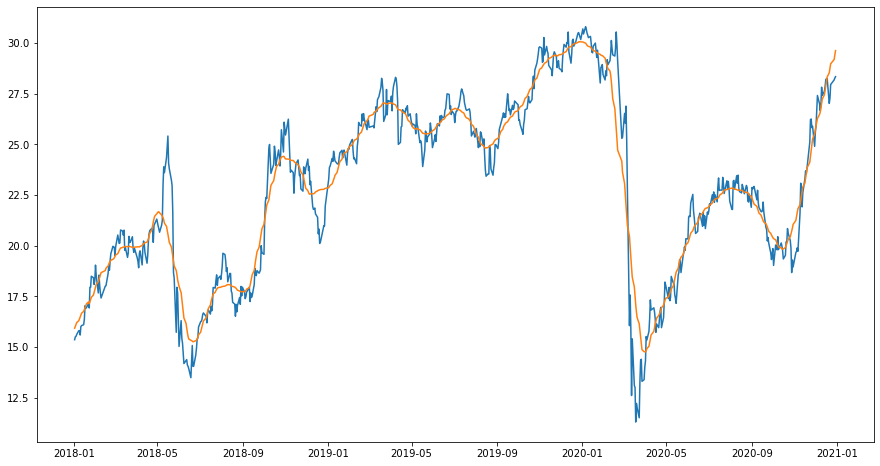

In [30]:
ax, fig = plt.subplots(figsize=(15,8))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

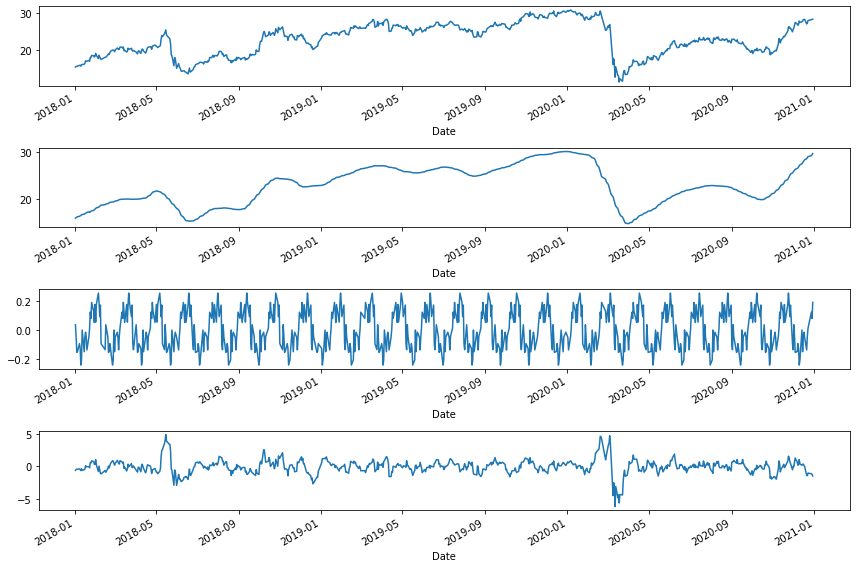

In [31]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)
plt.tight_layout()


### 3) Cálculo da média móvel

In [36]:
df['Close'].rolling(7).mean()

Date
2018-01-02          NaN
2018-01-03          NaN
2018-01-04          NaN
2018-01-05          NaN
2018-01-08          NaN
                ...    
2020-12-22    27.778572
2020-12-23    27.825715
2020-12-28    27.872858
2020-12-29    27.884286
2020-12-30    27.898572
Name: Close, Length: 739, dtype: float64

In [37]:
media_movel7d = df['Close'].rolling(7).mean()
media_movel14d = df['Close'].rolling(14).mean()
media_movel21d = df['Close'].rolling(21).mean()

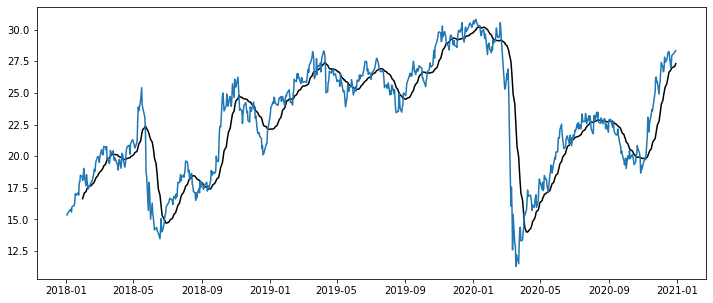

In [43]:
fig, ax = plt.subplots(figsize=(12,5))
#plt.plot(media_movel7d, 'orange')
#plt.plot(media_movel14d, 'red')
plt.plot(media_movel21d, 'black')
plt.plot(df['Close'])

### 4) Extração de features

In [44]:
df.head()

Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2018-01-02  15.019504  15.353476  15.019504  15.353476  33461800        0.0   
2018-01-03  15.297813  15.511185  15.186490  15.492632  55940900        0.0   
2018-01-04  15.566848  15.733833  15.418416  15.520462  37064900        0.0   
2018-01-05  15.492632  15.641064  15.372030  15.613233  26958200        0.0   
2018-01-08  15.529737  15.798772  15.501906  15.798772  28400000        0.0   

            Stock Splits  
Date                      
2018-01-02             0  
2018-01-03             0  
2018-01-04             0  
2018-01-05             0  
2018-01-08             0

In [45]:
df.reset_index(inplace=True)

In [46]:
df.head()

Date       Open       High        Low      Close    Volume  Dividends  \
0 2018-01-02  15.019504  15.353476  15.019504  15.353476  33461800        0.0   
1 2018-01-03  15.297813  15.511185  15.186490  15.492632  55940900        0.0   
2 2018-01-04  15.566848  15.733833  15.418416  15.520462  37064900        0.0   
3 2018-01-05  15.492632  15.641064  15.372030  15.613233  26958200        0.0   
4 2018-01-08  15.529737  15.798772  15.501906  15.798772  28400000        0.0   

   Stock Splits  
0             0  
1             0  
2             0  
3             0  
4             0

In [47]:
# criar features para cada período
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [48]:
df.head()

Date       Open       High        Low      Close    Volume  Dividends  \
0 2018-01-02  15.019504  15.353476  15.019504  15.353476  33461800        0.0   
1 2018-01-03  15.297813  15.511185  15.186490  15.492632  55940900        0.0   
2 2018-01-04  15.566848  15.733833  15.418416  15.520462  37064900        0.0   
3 2018-01-05  15.492632  15.641064  15.372030  15.613233  26958200        0.0   
4 2018-01-08  15.529737  15.798772  15.501906  15.798772  28400000        0.0   

   Stock Splits  year  month  day  
0             0  2018      1    2  
1             0  2018      1    3  
2             0  2018      1    4  
3             0  2018      1    5  
4             0  2018      1    8

In [49]:
# Rentabilidade é preço atual/ preço anterior * 100 - 100
df[['Close']]

Close
0    15.353476
1    15.492632
2    15.520462
3    15.613233
4    15.798772
..         ...
734  27.280001
735  27.950001
736  28.180000
737  28.270000
738  28.340000

[739 rows x 1 columns]

In [50]:
15.492632/15.353477 * 100 - 100

0.9063419315377388

In [51]:
df['Close'].head()

0    15.353476
1    15.492632
2    15.520462
3    15.613233
4    15.798772
Name: Close, dtype: float64

In [52]:
df['Close'].shift()

0            NaN
1      15.353476
2      15.492632
3      15.520462
4      15.613233
         ...    
734    27.020000
735    27.280001
736    27.950001
737    28.180000
738    28.270000
Name: Close, Length: 739, dtype: float64

In [53]:
df['rentabilidade'] = df['Close'] / df['Close'].shift() * 100 -100

In [55]:
df.head()

Date       Open       High        Low      Close    Volume  Dividends  \
0 2018-01-02  15.019504  15.353476  15.019504  15.353476  33461800        0.0   
1 2018-01-03  15.297813  15.511185  15.186490  15.492632  55940900        0.0   
2 2018-01-04  15.566848  15.733833  15.418416  15.520462  37064900        0.0   
3 2018-01-05  15.492632  15.641064  15.372030  15.613233  26958200        0.0   
4 2018-01-08  15.529737  15.798772  15.501906  15.798772  28400000        0.0   

   Stock Splits  year  month  day  rentabilidade  
0             0  2018      1    2            NaN  
1             0  2018      1    3       0.906351  
2             0  2018      1    4       0.179635  
3             0  2018      1    5       0.597731  
4             0  2018      1    8       1.188346

In [56]:
def features_extraction(df_):
    # criar features para cada período
    df_['year'] = df_['Date'].dt.year
    df_['month'] = df_['Date'].dt.month
    df_['day'] = df_['Date'].dt.day
    df_['rentabilidade'] = df_['Close'] / df_['Close'].shift() * 100 -100

In [57]:
df.reset_index(inplace=True)

In [58]:
features_extraction(df)

In [59]:
df.head()

index       Date       Open       High        Low      Close    Volume  \
0      0 2018-01-02  15.019504  15.353476  15.019504  15.353476  33461800   
1      1 2018-01-03  15.297813  15.511185  15.186490  15.492632  55940900   
2      2 2018-01-04  15.566848  15.733833  15.418416  15.520462  37064900   
3      3 2018-01-05  15.492632  15.641064  15.372030  15.613233  26958200   
4      4 2018-01-08  15.529737  15.798772  15.501906  15.798772  28400000   

   Dividends  Stock Splits  year  month  day  rentabilidade  
0        0.0             0  2018      1    2            NaN  
1        0.0             0  2018      1    3       0.906351  
2        0.0             0  2018      1    4       0.179635  
3        0.0             0  2018      1    5       0.597731  
4        0.0             0  2018      1    8       1.188346

### Hipotese 1) Exite um melhor dia para investir no ativo?

- Considerando 3 anos de dados de rentabilidade, o agrupamento da mostra que os meses de janeiro, junho e setembro são mais interessantes para investir

<AxesSubplot:xlabel='month'>

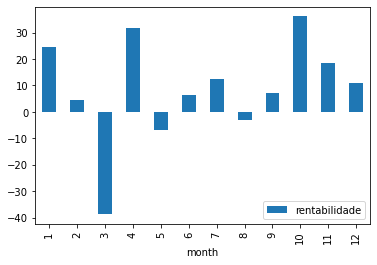

In [60]:
df.groupby('month').agg({'rentabilidade':'sum'}).plot(kind='bar')

In [61]:
df.set_index('Date', inplace=True)

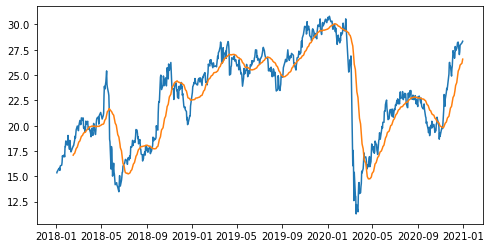

In [62]:
media_movel30d = df['Close'].rolling(30).mean()
media_movel90d = df['Close'].rolling(90).mean()
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df['Close'])
plt.plot(media_movel30d)
#plt.plot(media_movel90d)

### Hipotese 2) Existe um melhor dia para investir no ativo?

<AxesSubplot:xlabel='day'>

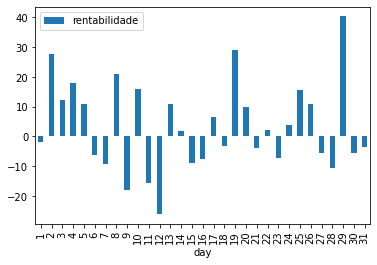

In [63]:
df.groupby('day').agg({'rentabilidade':'sum'}).plot(kind='bar')

In [72]:
df.iloc[0]

index            0.000000e+00
Open             1.501950e+01
High             1.535348e+01
Low              1.501950e+01
Close            1.535348e+01
Volume           3.346180e+07
Dividends        0.000000e+00
Stock Splits     0.000000e+00
year             2.018000e+03
month            1.000000e+00
day              2.000000e+00
rentabilidade             NaN
Name: 2018-01-02 00:00:00, dtype: float64

In [75]:
df.iloc[-1]

index            7.380000e+02
Open             2.835000e+01
High             2.849000e+01
Low              2.820000e+01
Close            2.834000e+01
Volume           3.696820e+07
Dividends        0.000000e+00
Stock Splits     0.000000e+00
year             2.020000e+03
month            1.200000e+01
day              3.000000e+01
rentabilidade    2.476112e-01
Name: 2020-12-30 00:00:00, dtype: float64

In [77]:
df['Close'].iloc[-1] / df['Close'].iloc[0] * 100 - 100

84.58361445346085

In [78]:
#df['rentabilidade'].sum()

103.58174454222043

### 5) Correlação de séries temporais

In [79]:
tickets = ['VALE3.SA','ITUB4.SA','PETR4.SA','ABEV3.SA', 'BBDC4.SA', 'BBAS3.SA']

In [80]:
dfs = []

for t in tickets:
    print('Reading ticker {}...'.format(t))
    ticket = yf.Ticker(t)
    aux = ticket.history(interval='1d', start='2018-01-01', end='2021-01-01')
    aux.reset_index(inplace=True)
    aux['ticket'] = t
    dfs.append(aux)

Reading ticker VALE3.SA...
Reading ticker ITUB4.SA...
Reading ticker PETR4.SA...
Reading ticker ABEV3.SA...
Reading ticker BBDC4.SA...
Reading ticker BBAS3.SA...


In [81]:
dfs[1]

Date       Open       High        Low      Close    Volume  \
0   2018-01-02  24.855634  25.482832  24.855634  25.482832  16650900   
1   2018-01-03  25.494452  25.749977  25.302807  25.657059  22295700   
2   2018-01-04  25.697710  26.307487  25.697710  26.191338  23222550   
3   2018-01-05  26.202953  26.319100  25.900968  26.266834  15717450   
4   2018-01-08  26.168108  26.319099  26.005499  26.179722  12708150   
..         ...        ...        ...        ...        ...       ...   
734 2020-12-22  31.085321  31.564017  31.065375  31.165104  19659000   
735 2020-12-23  31.234913  31.962929  31.185050  31.853230  19959200   
736 2020-12-28  32.132471  32.341899  31.923038  32.082603  15444600   
737 2020-12-29  32.182327  32.302000  31.843251  32.012787  16384200   
738 2020-12-30  32.112524  32.242172  31.544071  31.544071  25644400   

     Dividends  Stock Splits    ticket  
0         0.01           0.0  ITUB4.SA  
1         0.00           0.0  ITUB4.SA  
2         0.00           0.0  ITUB4.SA  
3         0.00           0.0  ITUB4.SA  
4         0.00           0.0  ITUB4.SA  
..         ...           ...       ...  
734       0.00           0.0  ITUB4.SA  
735       0.00           0.0  ITUB4.SA  
736       0.00           0.0  ITUB4.SA  
737       0.00           0.0  ITUB4.SA  
738       0.00           0.0  ITUB4.SA  

[739 rows x 9 columns]

In [82]:
for d in dfs:
    features_extraction(d) 

In [83]:
dfs[0]

Date       Open       High        Low      Close    Volume  \
0   2018-01-02  36.342992  37.511291  36.342992  37.493317  14156500   
1   2018-01-03  37.592175  37.637109  37.115867  37.268646  12744200   
2   2018-01-04  37.574204  38.077468  37.313583  37.421425  18433000   
3   2018-01-05  37.358516  38.005573  37.124858  38.005573  15251300   
4   2018-01-08  38.104428  38.850338  38.104428  38.850338  14542800   
..         ...        ...        ...        ...        ...       ...   
734 2020-12-22  86.860001  86.989998  85.430000  86.940002  23157000   
735 2020-12-23  86.529999  87.529999  86.400002  87.360001  17710200   
736 2020-12-28  87.790001  88.580002  87.080002  87.309998  26001300   
737 2020-12-29  87.970001  88.199997  86.510002  87.070000  19727500   
738 2020-12-30  87.190002  87.589996  86.650002  87.449997  30102700   

     Dividends  Stock Splits    ticket  year  month  day  rentabilidade  
0          0.0             0  VALE3.SA  2018      1    2            NaN  
1          0.0             0  VALE3.SA  2018      1    3      -0.599228  
2          0.0             0  VALE3.SA  2018      1    4       0.409939  
3          0.0             0  VALE3.SA  2018      1    5       1.561000  
4          0.0             0  VALE3.SA  2018      1    8       2.222739  
..         ...           ...       ...   ...    ...  ...            ...  
734        0.0             0  VALE3.SA  2020     12   22       0.092104  
735        0.0             0  VALE3.SA  2020     12   23       0.483090  
736        0.0             0  VALE3.SA  2020     12   28      -0.057238  
737        0.0             0  VALE3.SA  2020     12   29      -0.274880  
738        0.0             0  VALE3.SA  2020     12   30       0.436427  

[739 rows x 13 columns]

In [84]:
correlacao = pd.DataFrame()
for d in dfs:
    correlacao[d['ticket'].iloc[0]] = d['rentabilidade']

In [85]:
correlacao.head()

VALE3.SA  ITUB4.SA  PETR4.SA  ABEV3.SA  BBDC4.SA  BBAS3.SA
0       NaN       NaN       NaN       NaN       NaN       NaN
1 -0.599228  0.683703  0.906351  0.230509  0.459743  1.275437
2  0.409939  2.082385  0.179635 -0.551957  1.640769  0.959537
3  1.561000  0.288251  0.597731  0.370011  0.566409  0.000000
4  2.222739 -0.331644  1.188346 -0.184328 -0.028143  0.237581

In [86]:
correlacao.corr()

VALE3.SA  ITUB4.SA  PETR4.SA  ABEV3.SA  BBDC4.SA  BBAS3.SA
VALE3.SA  1.000000  0.404608  0.521135  0.303852 -0.071519 -0.004870
ITUB4.SA  0.404608  1.000000  0.611854  0.526098  0.143897  0.212301
PETR4.SA  0.521135  0.611854  1.000000  0.441818  0.069583  0.164594
ABEV3.SA  0.303852  0.526098  0.441818  1.000000  0.016654  0.021086
BBDC4.SA -0.071519  0.143897  0.069583  0.016654  1.000000  0.769370
BBAS3.SA -0.004870  0.212301  0.164594  0.021086  0.769370  1.000000

## Visualização de dados Seaborn

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [87]:
import seaborn as sns

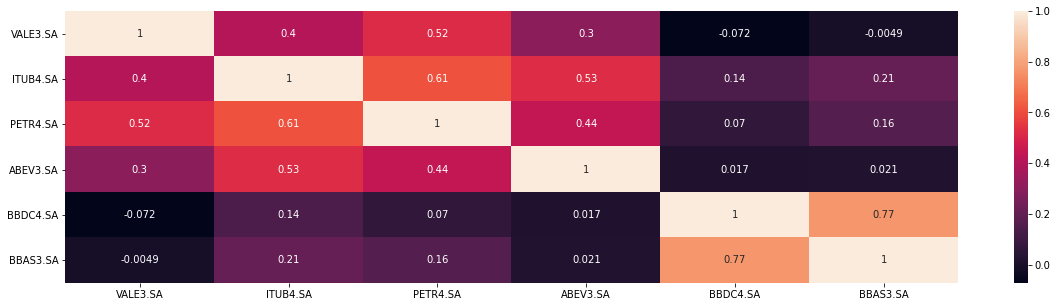

In [90]:
ax, fig = plt.subplots(figsize=(20,5))
ax = sns.heatmap(correlacao.corr(), annot=True)

## Visualização de dados Plotly

https://plotly.com/

In [91]:
import plotly.graph_objs as go

In [92]:
def plot_lines(df_, columns=['Open','Close','High','Low']):
    
    fig = go.Figure()
    for c in columns:
        fig.add_trace(go.Scatter(x = list(df_.index),
                    y = df_[c],
                    mode = 'markers+lines',
                    name = c))        
    return fig   

In [93]:
plot_lines(df)

In [94]:
def plotCandleStick(df, acao='ticket'):
    trace1 = {
        'x': df.index,
        'open': df.Open,
        'close': df.Close,
        'high': df.High,
        'low': df.Low,
        'type': 'candlestick',
        'name': acao,
        'showlegend': False
    }

    data = [trace1]
    layout = go.Layout()

    fig = go.Figure(data=data, layout=layout)
    return fig

In [95]:
plotCandleStick(df)

# O QUE VOCÊ PODE FAZER ALÉM DISSO?
#### - Teste de hipóteses para verificar se uma série é ou não estacionária
#### - Fazer previsão (usando uma autoregressive integrated moving average - ARIMA) ou deep learning models (LSTM);
#### - Integrar mais dados e analisar correlação (ex. valor da rentabilidade)
#### - Explorar a visualização usando as bibliotecas